# 붓꽃 품종 분류

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

In [15]:
iris_data = load_iris()
print("iris_dataset의 키 : \n",iris_data.keys())
print("타깃의 이름:",iris_data['target_names'])
print("특성의 이름 : \n",iris_data['feature_names'])
print("data의 타입:",type(iris_data['data']))
print("data의 크기 : ",iris_data['data'].shape)
print("data의 처음 다섯 행 : \n",iris_data['data'][:5])
print("target의 타입:",type(iris_data['target']))
print("target의 크기 : ",iris_data['target'].shape)
print("타깃:\n",iris_data['target'])

iris_dataset의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기 :  (150, 4)
data의 처음 다섯 행 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입: <class 'numpy.ndarray'>
target의 크기 :  (150,)
타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'],iris_data['target'],random_state=0
)
print("X_train의 크기 :",X_test.shape)
print("y_Train의 크기 : ",y_train.shape)
print("X test 크기 : ",X_test.shape)
print("y_test 크기 : ",y_test.shape)


X_train의 크기 : (38, 4)
y_Train의 크기 :  (112,)
X test 크기 :  (38, 4)
y_test 크기 :  (38,)


- pd.plotting.scatter_matrix
    - 여러 변수 (컬럼)들의 쌍(pair) 을 모두 조합해서 산점도를 그린다. 즉, 행렬 형태로 그래프를 배치한다.
    - (i,j) 위치에는 변수들이 들어가고, 대각선에는 히스토그램 표시
    - iris_dataframe의 indices가 sepal length, sepal width, petal length, petal width 이므로 그애 맞춰 그려짐
- c = y_train 
    - c : color의 약자. y_train인 타깃에 클래스마다 색이  다르게 표시됨 (setosa, versicolor, irginica)
- hist_kwds = {'bins':2-}, s = 60
    - hist_kwds = {'bins':20} 대각선에 표시되는 히스토그램의 bin개수를 20개로 설정
    - s = 60 : 산점도의 점의 크기를 60으로 지정
- mglearn
    - 책에서 제공하는 보조 라이브러리. 학습용 유틸리티 패키지
- cmap
    - color map. 색상표 지정. cm3 는 3가지 색상

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

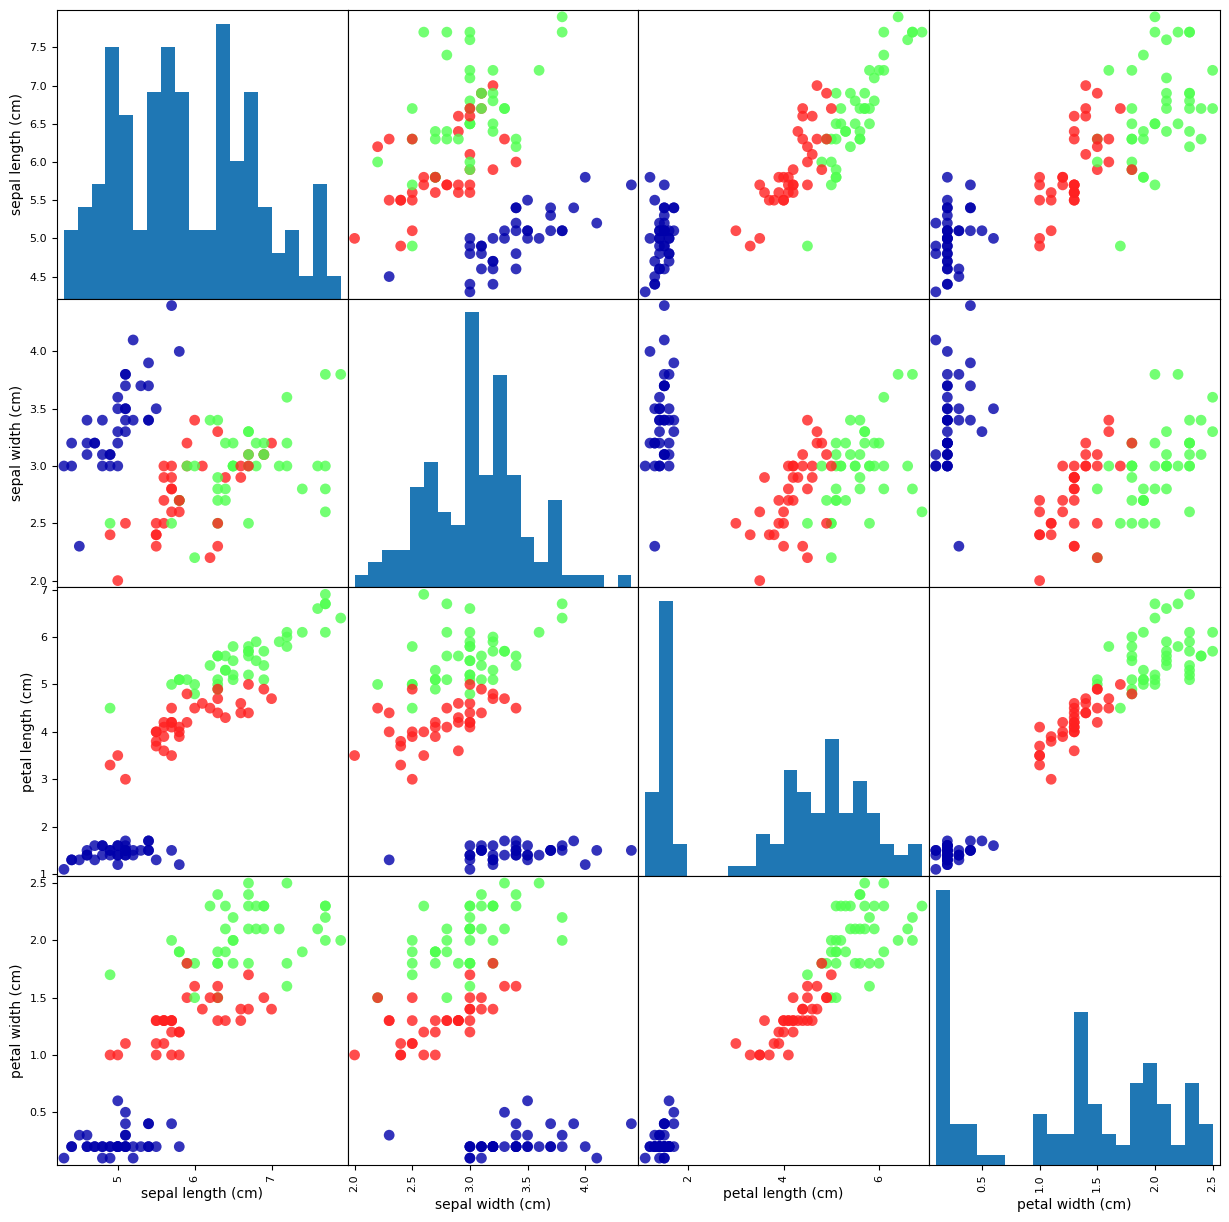

In [17]:
iris_dataframe = pd.DataFrame(X_train,columns=iris_data.feature_names)
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='o',
                           hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# 예측
X_new = np.array([[5,2.0,1,0.2]])
prediction = knn.predict(X_new)
print("예측 : ",prediction)
print("예측한 타깃의 이름 : ", iris_data['target_names'][prediction])

# 모델 평가
y_pred = knn.predict(X_test)
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred==y_test)))
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test,y_test)))

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']
테스트 세트의 정확도 : 0.97
테스트 세트의 정확도 : 0.97


# 지도학습 알고리즘

Text(0.5, 0, '첫번째 특성')

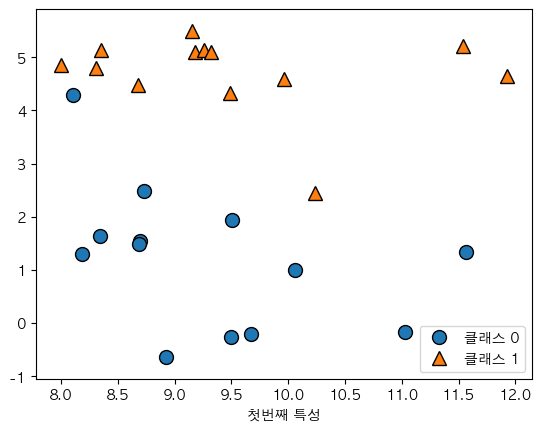

In [29]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫번째 특성")

Text(0, 0.5, '타깃')

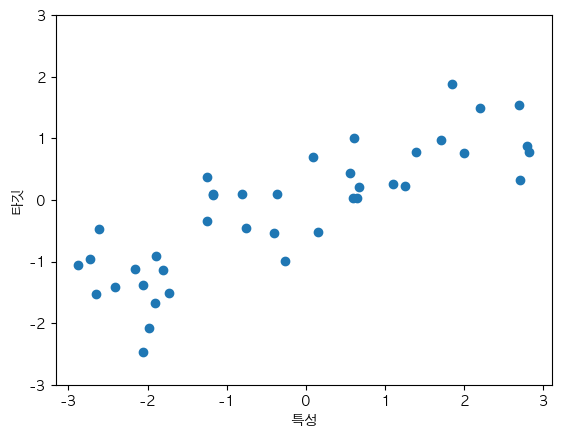

In [30]:
X, y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

In [32]:
cancer=load_breast_cancer()
print("cancer.keys(): \n",cancer.keys())
print("유방암 데이터의 형태:",cancer.data.shape)
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})
print("특성 이름: \n",cancer.feature_names)

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태: (569, 30)
클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}
특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 최근접 이웃

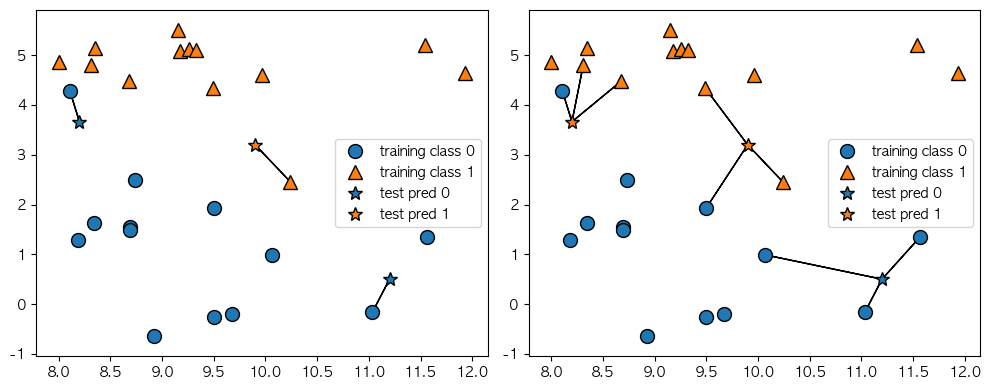

In [39]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
plt.sca(axes[0])
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.sca(axes[1])
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.tight_layout()

In [42]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print("데이터의 형태:",data.shape)
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

데이터의 형태: (506, 13)
X.shape: (506, 104)


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


/var/folders/gw/jvr6w8xj12gc01xmg3zw29pw0000gn/T/ipykernel_52578/1172653564.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(loc=3)


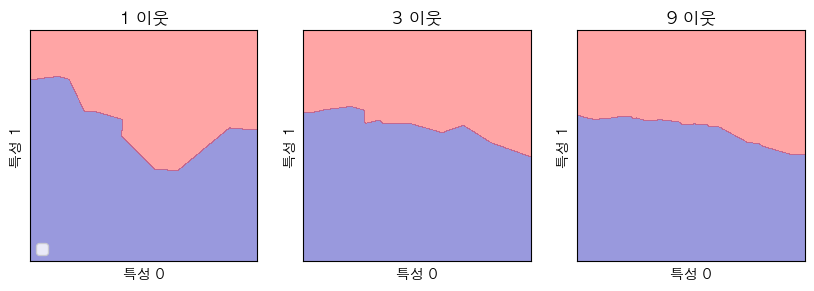

In [45]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("테스트 세트 예측:",clf.predict(X_test))
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test,y_test)))


fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다.
    - 이웃을 적게 사용하면 모델의 복잡도가 높다지고
    - 이웃을 많이 사용하면 복잡도는 낮아진다.

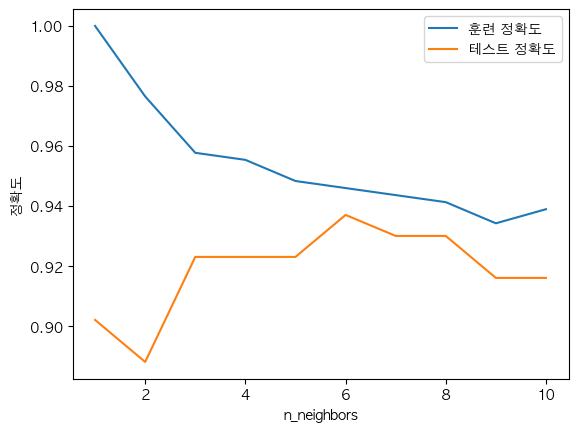

In [47]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

# 1 에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings,test_accuracy,label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## K-최근접 이웃 회귀

In [50]:
from sklearn.neighbors import KNeighborsRegressor

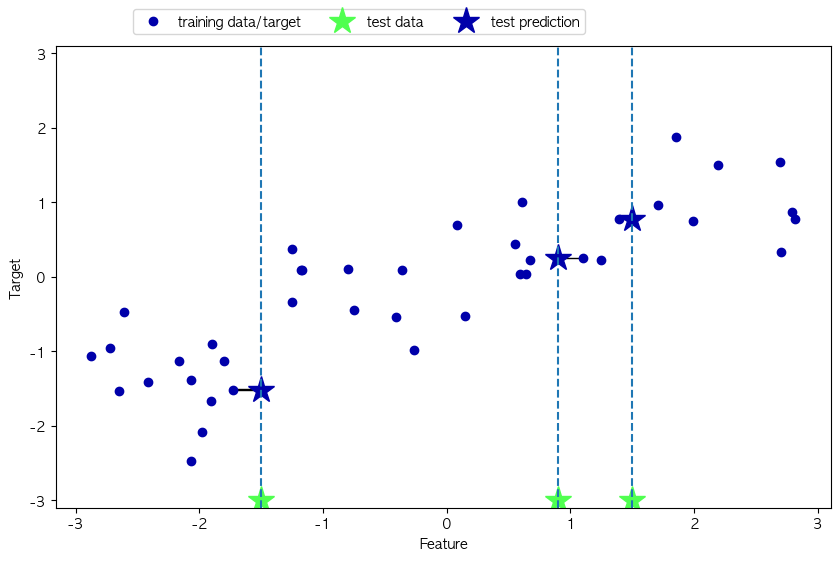

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

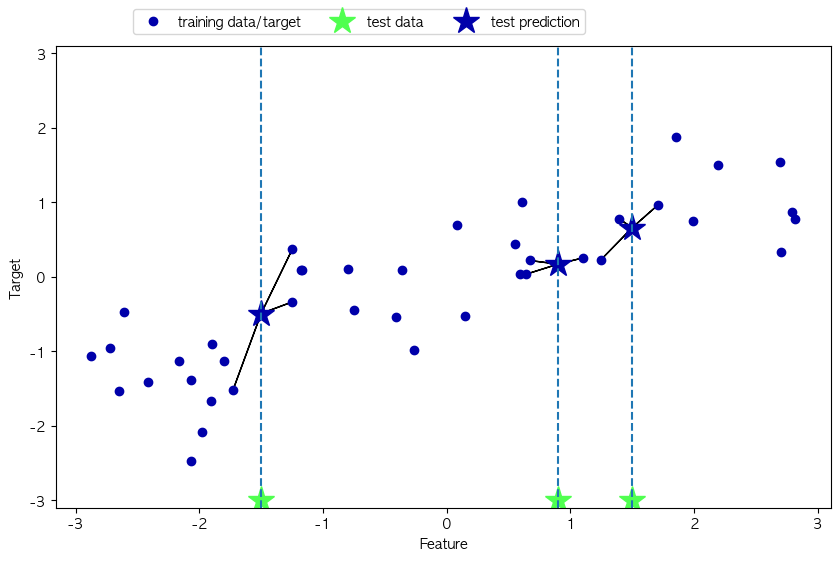

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


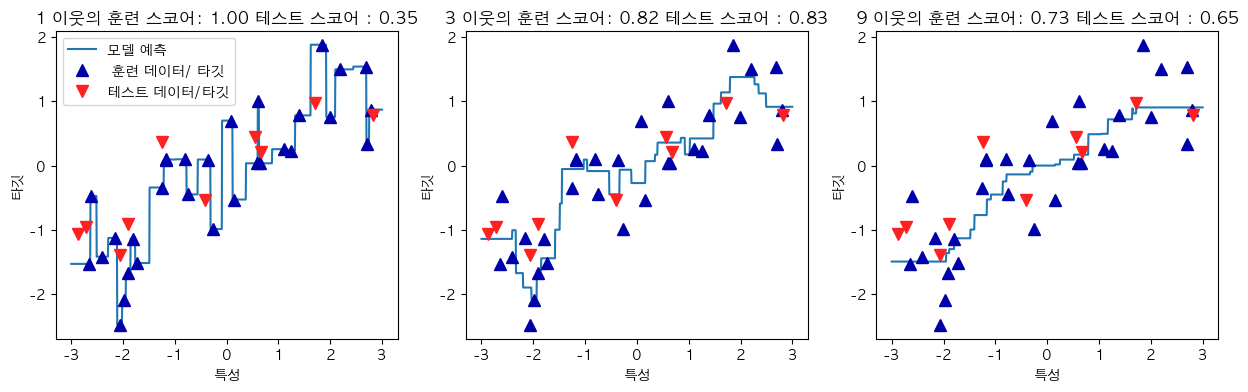

In [60]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("테스트 세트 예측:\n",reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

fig,axes = plt.subplots(1,3,figsize=(15,4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다
line  = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", " 훈련 데이터/ 타깃","테스트 데이터/타깃"],loc="best")

- 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감  ==> 불안정한 예측  

KNeighbors 분류기에 중요한 매개변수
1. 데이터 포인트 사이의 거리를 재는 방법
2. 이웃의 수  

k-NN의 장점  
1. 이해하기 매우 쉬운 모델
2. 많이 조정하지 않아도 자주 좋은 성능을 발휘 => 복잡한 알고리즘 적용 전 시도 가능
* 훈련 세트가 매우 크면 예측이 느려짐 ==> 전처리 과정이 중요함